## Observations and Insights

## Dependencies and starter code

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

                        
# Combine the data into a single dataset
merged= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_df = pd.DataFrame(merged)

print(mouse_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


## Summary statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_group = mouse_df.set_index("Drug Regimen")

regimen_df = regimen_group.iloc[:, 5]

print(mouse_df["Drug Regimen"].unique())
    
ram = regimen_group.loc["Ramicane", "Tumor Volume (mm3)"]
cap = regimen_group.loc["Capomulin", "Tumor Volume (mm3)"]
inf = regimen_group.loc["Infubinol", "Tumor Volume (mm3)"]
pla = regimen_group.loc["Placebo", "Tumor Volume (mm3)"]
cef = regimen_group.loc["Ceftamin", "Tumor Volume (mm3)"]
ste = regimen_group.loc["Stelasyn", "Tumor Volume (mm3)"]
zon = regimen_group.loc["Zoniferol", "Tumor Volume (mm3)"]
ket = regimen_group.loc["Ketapril", "Tumor Volume (mm3)"]
pro = regimen_group.loc["Propriva", "Tumor Volume (mm3)"]
naf = regimen_group.loc["Naftisol", "Tumor Volume (mm3)"]

# Do I really need ddof=0, Standard Deviation = np.std(df,ddof = 0)

ram_df = {"Mean": (np.mean(ram)), "Median": (np.median(ram)), "Variance": (np.var(ram)), "SEM": (sem(ram))}
cap_df = {"Mean": (np.mean(cap)), "Median": (np.median(cap)), "Variance": (np.var(cap)), "SEM": (sem(cap))}
inf_df = {"Mean": (np.mean(inf)), "Median": (np.median(inf)), "Variance": (np.var(inf)), "SEM": (sem(inf))}
pla_df = {"Mean": (np.mean(pla)), "Median": (np.median(pla)), "Variance": (np.var(pla)), "SEM": (sem(pla))}
cef_df = {"Mean": (np.mean(cef)), "Median": (np.median(cef)), "Variance": (np.var(cef)), "SEM": (sem(cef))}
ste_df = {"Mean": (np.mean(ste)), "Median": (np.median(ste)), "Variance": (np.var(ste)), "SEM": (sem(ste))}
zon_df = {"Mean": (np.mean(zon)), "Median": (np.median(zon)), "Variance": (np.var(zon)), "SEM": (sem(zon))}
ket_df = {"Mean": (np.mean(ket)), "Median": (np.median(ket)), "Variance": (np.var(ket)), "SEM": (sem(ket))}
pro_df = {"Mean": (np.mean(pro)), "Median": (np.median(pro)), "Variance": (np.var(pro)), "SEM": (sem(pro))}
naf_df = {"Mean": (np.mean(naf)), "Median": (np.median(naf)), "Variance": (np.var(naf)), "SEM": (sem(naf))}


summary_table = pd.DataFrame({'Ramicane':ram_df, 'Capomulin':cap_df, 'Infubinol':inf_df, 'Placebo':pla_df, 'Ceftamin':cef_df, 'Stelasyn':ste_df,
 'Zoniferol':zon_df, 'Ketapril':ket_df, 'Propriva':pro_df, 'Naftisol':naf_df})
summary_table

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.322552,54.331565
Median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.854632,52.509285
SEM,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.512884,0.596466
Variance,23.383692,24.839296,42.886388,60.830138,39.069446,59.122106,48.266689,68.188930,42.088020,65.817708


## Bar plots

Text(0.5, 1.0, 'Number of Data Points by Treatment Group')

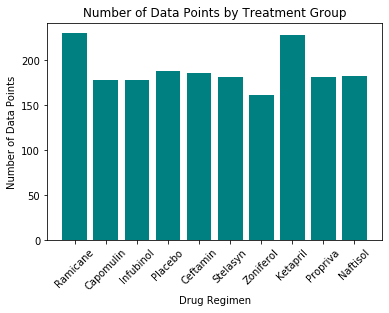

In [54]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

treatment_group = mouse_df.groupby("Drug Regimen")
treatment_df = pd.DataFrame(treatment_group.count())

x_axis = mouse_df["Drug Regimen"].unique()
y_axis = treatment_df["Mouse ID"]

plt.bar(x_axis, y_axis, color='teal', alpha=1, align="center")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points by Treatment Group")

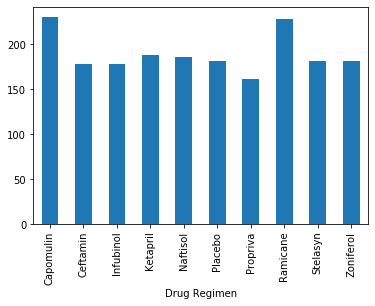

In [53]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_df["Mouse ID"].plot(kind="bar")

## Pie plots

Text(0.5, 1.0, 'Percentage of Males vs. Females')

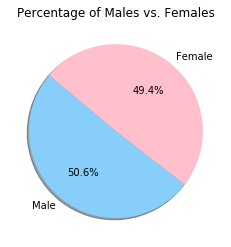

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_df = mouse_df["Sex"].value_counts()
male = mf_df["Male"]
female = mf_df["Female"]
mf = [male, female]

labels = ["Male", "Female"]
colors = ["lightskyblue", "pink"]

plt.pie(mf, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Males vs. Females")

Text(0.5, 1.0, 'Percentage of Males vs. Females')

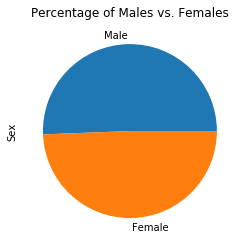

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mf_df.plot(kind="pie")
plt.title("Percentage of Males vs. Females")

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

plt.plot()

plt.xlabel("")
plt.ylabel("")
plt.title("")

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

df.plot(kind=box)

plt.xlabel("")
plt.ylabel("")
plt.title("")

## Line and scatter plots

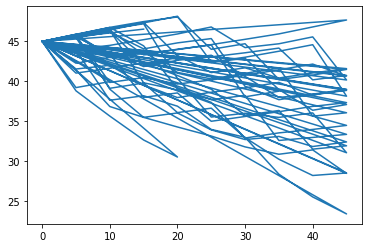

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment_index = mouse_df.set_index("Drug Regimen")

timepoint_tumor = treatment_index.loc["Capomulin", "Timepoint":"Tumor Volume (mm3)"]
timepoint_tumor

plt.plot(timepoint_tumor["Timepoint"], timepoint_tumor["Tumor Volume (mm3)"])

# group by time?

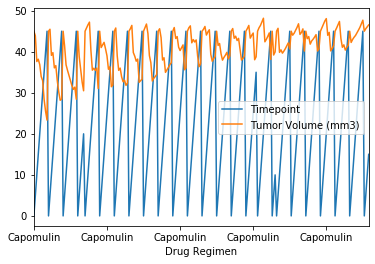

In [60]:
timepoint_tumor.plot(kind="line")

In [13]:
# Failed Attempt
timepoint_group = mouse_df.groupby("Timepoint")
timepoint_df_mean = pd.DataFrame(timepoint_group.mean())
timepoint_df_mean

timepoint_df_max = pd.DataFrame(timepoint_group.max())
timepoint_tumor = timepoint_df_max.loc[timepoint_df_max["Drug Regimen"] == "Capomulin",  "Tumor Volume (mm3)"]
print(timepoint_tumor)

Series([], Name: Tumor Volume (mm3), dtype: float64)


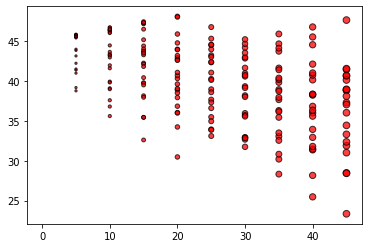

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
treatment_index = mouse_df.set_index("Drug Regimen")

timepoint_tumor = treatment_index.loc["Capomulin", "Timepoint":"Tumor Volume (mm3)"]
timepoint_tumor


plt.scatter(timepoint_tumor["Timepoint"], timepoint_tumor["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=timepoint_tumor["Timepoint"], alpha=0.75)


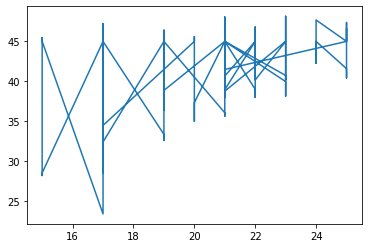

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

treatment_index = mouse_df.set_index("Drug Regimen")

mouseweight_tumor = treatment_index.loc["Capomulin", "Weight (g)":"Tumor Volume (mm3)"]
mouseweight_tumor

plt.plot(mouseweight_tumor["Weight (g)"], mouseweight_tumor["Tumor Volume (mm3)"])
